In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from scipy import stats
from scipy.stats import wilcoxon
from sklearn.metrics import roc_auc_score, r2_score
import os
from os.path import join
import pandas as pd

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

plt.style.use('CCB_plot_style_0v4.mplstyle');
c_styles      = mpl.rcParams['axes.prop_cycle'].by_key()['color']   # fetch the defined color styles
high_contrast = ['#004488', '#DDAA33', '#BB5566', '#000000']


Bad key text.latex.preview in file CCB_plot_style_0v4.mplstyle, line 55 ('text.latex.preview  : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file CCB_plot_style_0v4.mplstyle, line 63 ('mathtext.fallback_to_cm : True ## When True, use symbols from the Computer Modern fonts')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution


C:\Users\alexk\projects\kcat_paper\code\model_fitting


## 1. Plotting performance of different models:

### (a) Pearson r

In [18]:
models = ["str_fp", "diff_fp", "ESM1b", "ESM1b_ts", "ESM1b_ts_diff_fp"]
model_names = {"str_fp" : "str. FP",
               "diff_fp" : "diff. FP",
               "ESM1b" : "ESM-1b",
               "ESM1b_ts" : "ESM-$1b_{ESP}$",
               "ESM1b_ts_diff_fp" : "ESM-$1b_{ESP}$\n + diff. FP"}

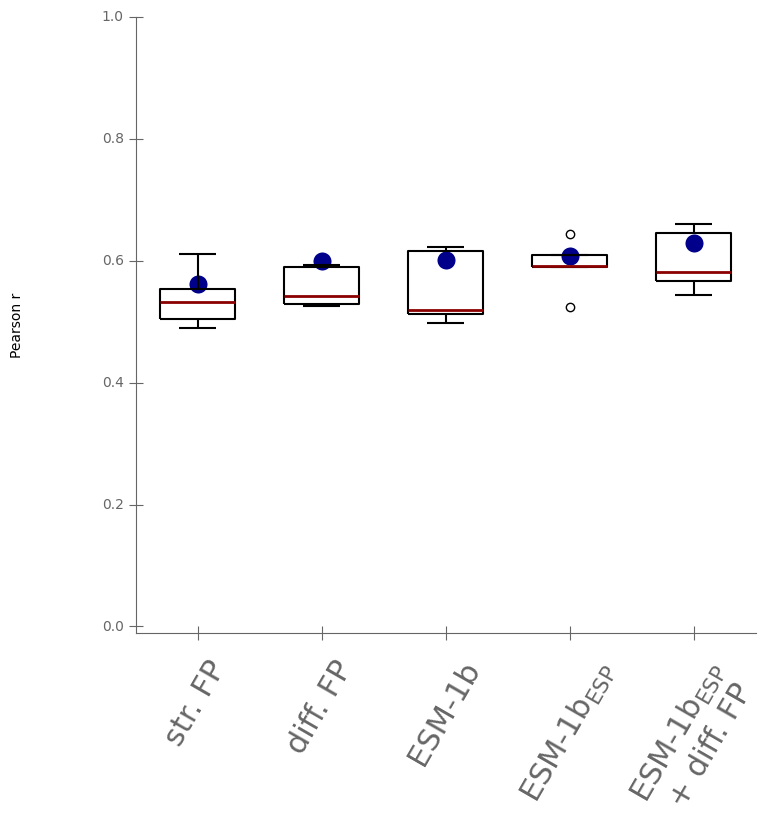

In [19]:
fig, ax = plt.subplots(figsize= (8,8))


plt.rcParams.update({'font.size': 28})
plt.ylim(-0.01, 1)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join("..", "..", "data", "training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("..", "..", "data",  "training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("..", "..", "data", "training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
    Pearson_test = stats.pearsonr(test_y, pred_y)[0]
    
    if i == 0:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(Pearson_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})




ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
#ax.locator_params(axis="y", nbins=4)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis='x', which="minor",length=0, rotation = 60)
#loc = plticker.MultipleLocator(base=0.02) # this locator puts ticks at regular intervals
#ax.yaxis.set_major_locator(loc)

plt.ylabel("Pearson r")
ax.yaxis.set_label_coords(-0.18, 0.5)
#plt.legend(loc = "upper right")
plt.show()

### (b) MSE

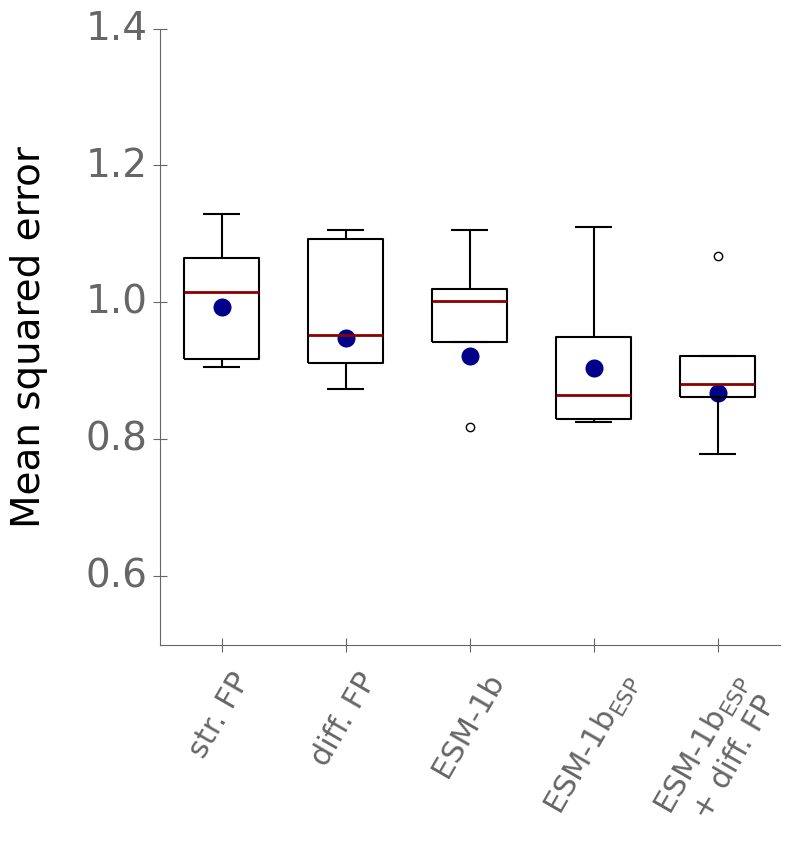

In [20]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})
plt.ylim(0.5, 1.4)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join("..", "..", "data", "training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("..", "..", "data",  "training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("..", "..", "data", "training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
    MSE_test = np.mean(abs(test_y -  pred_y)**2)

    
    if i == 0:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(MSE_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})




ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
#ax.locator_params(axis="y", nbins=4)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis='x', which="minor",length=0, rotation = 60)
#loc = plticker.MultipleLocator(base=0.02) # this locator puts ticks at regular intervals
#ax.yaxis.set_major_locator(loc)

plt.ylabel("Mean squared error")
ax.yaxis.set_label_coords(-0.18, 0.5)
#plt.legend()

plt.show()

### (c) Coefficients of determination

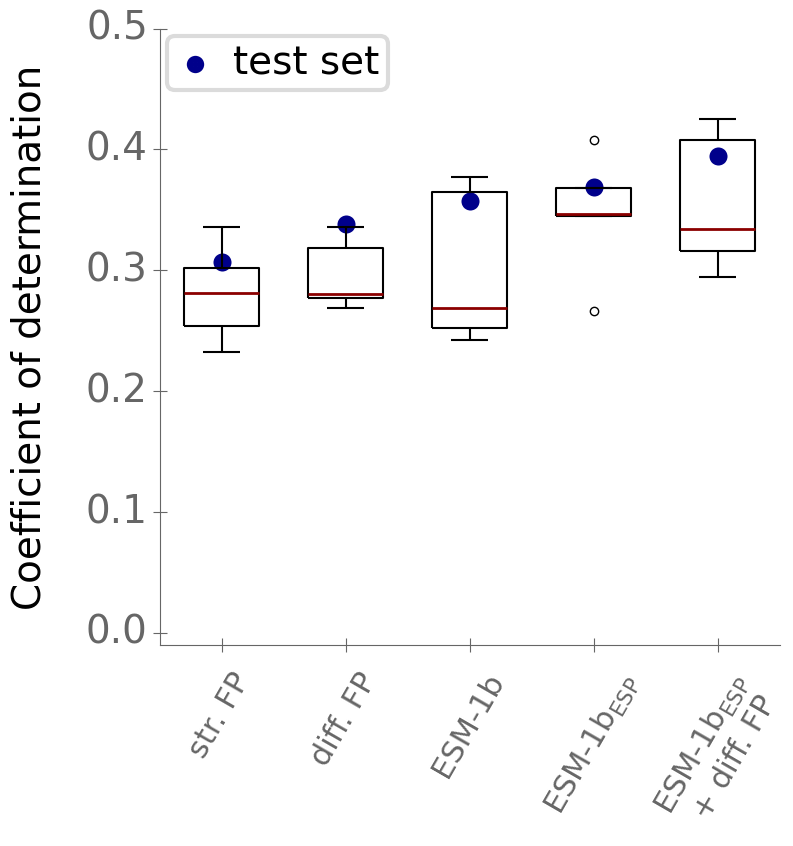

In [21]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})
plt.ylim(-0.01, 0.5)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join("..", "..", "data", "training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("..", "..", "data",  "training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("..", "..", "data", "training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
    R2_test = r2_score(test_y, pred_y)

    
    if i == 0:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(R2_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})



ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
#ax.locator_params(axis="y", nbins=4)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis='x', which="minor",length=0, rotation = 60)

plt.ylabel("Coefficient of determination")
ax.yaxis.set_label_coords(-0.18, 0.5)

leg = plt.legend(loc = "upper left", frameon=True)
leg.get_frame().set_linewidth(3.0)

plt.show()

### (d) Statistical tests

In [22]:
models

['str_fp', 'diff_fp', 'ESM1b', 'ESM1b_ts', 'ESM1b_ts_diff_fp']

In [23]:
pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[0] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[0] + ".npy"))
errors_str_fp = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[1] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[1] + ".npy"))
errors_diff_fp = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[2] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[2] + ".npy"))
errors_esm1b = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[3] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[3] + ".npy"))
errors_esm1b_ts = abs(pred_y-test_y)

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + models[4] + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + models[4] + ".npy"))
errors_esm1b_diff_fp = abs(pred_y-test_y)

In [24]:
d = errors_esm1b_diff_fp - errors_esm1b_ts
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with ESM1b/diff.fp and ESM1b_ts", p)

d = errors_esm1b_diff_fp - errors_esm1b
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with ESM1b/diff.fp and ESM1b", p)

d = errors_esm1b_diff_fp - errors_diff_fp
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with ESM1b/diff.fp and diff.fp", p)

d = errors_esm1b_diff_fp - errors_str_fp
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with ESM1b/diff.fp and str.fp", p)

d = errors_esm1b_ts - errors_esm1b
w, p = wilcoxon(d, alternative='less')
print("Difference between predictions with ESM1b_ts and ESM1b", p)

d = errors_diff_fp- errors_str_fp
w, p = wilcoxon(d, alternative='two-sided')
print("Difference between predictions with diff.fp and str.fp (two-sided)", p)

Difference between predictions with ESM1b/diff.fp and ESM1b_ts 0.004568738105303551
Difference between predictions with ESM1b/diff.fp and ESM1b 0.01628304601850678
Difference between predictions with ESM1b/diff.fp and diff.fp 0.04571626944538879
Difference between predictions with ESM1b/diff.fp and str.fp 0.0003341747266578134
Difference between predictions with ESM1b_ts and ESM1b 0.5411852307491818
Difference between predictions with diff.fp and str.fp (two-sided) 0.008892609024618676


## 2. Plotting predictions versus experimental values:

Loading predictions for the best model (ESM1b/diff. fp)

In [2]:
model = "ESM1b_ts_diff_fp"

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))

In [3]:
np.mean(abs(pred_y-test_y)), 10**np.mean(abs(pred_y-test_y))

(0.704895592991433, 5.068688393051791)

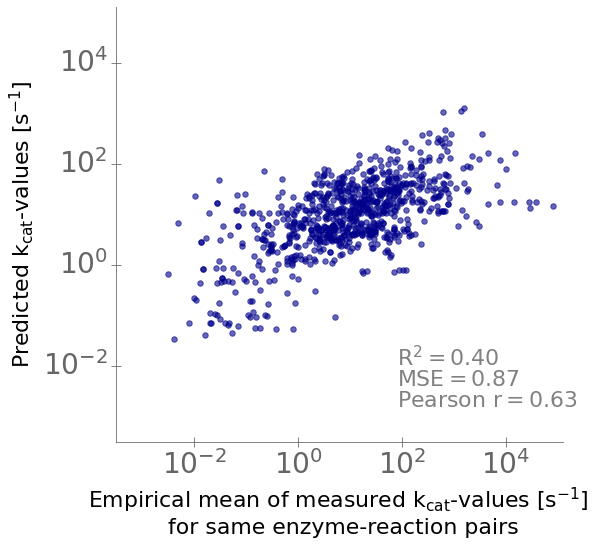

In [8]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


plt.ylim(ymax = 5.1, ymin = -3.5)
plt.xlim(xmax = 5.1, xmin = -3.5)

ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)
ax.text(1.9, -2, r'$R^2=0.40$', fontsize=22, c = "grey")
ax.text(1.9, -2.4, r'$MSE=0.87$', fontsize=22, c = "grey")
ax.text(1.9, -2.8, r'Pearson $r=0.63$', fontsize=22, c = "grey")

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])
plt.yticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])

plt.ylabel("Predicted $k_{cat}$-values [$s^{-1}$]", fontsize = 22)
plt.xlabel("Empirical mean of measured $k_{cat}$-values [$s^{-1}$] \n \
for same enzyme-reaction pairs", fontsize = 22)
plt.scatter(test_y, pred_y, alpha = 0.6, s=30, c="darkblue")
plt.show()

## 3. Comparison to the results of the DLkcat model

In [2]:
model = "ESM1b_ts_diff_fp"

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
data_train = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat.pkl"))
data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat.pkl"))
data_test["y_true"] = test_y
data_test["y_pred"] = pred_y

#### (a) First, we need to calculate the maximal sequence identity for all proteins in the test set compared to all proteins in the training set:

##### (a)(i) Creating a fasta file for every sequence in the training set and for every sequence in the test set:

In [3]:
'''for ind in data_test.index:
    ofile = open(join("..", "..", "data", "enzyme_data", "fasta_files", 
                      "test_seq_" + str(ind) + ".fasta"), "w")
    ofile.write("> seq_test_" + str(ind) + "\n" + data_test["Sequence"][ind] + "\n")
    ofile.close()
    
    
train_sequences = list(set(data_train["Sequence"]))
for ind, seq in enumerate(train_sequences):
    ofile = open(join("..", "..", "data", "enzyme_data", "fasta_files", 
                      "train_seq_" + str(ind) + ".fasta"), "w")
    ofile.write("> seq_train_" + str(ind) + "\n" + seq + "\n")
    ofile.close()''';

##### (a)(ii) Calculating the maximal pairwise sequence identities (Calculations were done on a HPC):

In [4]:
'''from Bio.Emboss.Applications import NeedleCommandline
import os
from os.path import join
import pandas as pd
import sys
import time
import numpy as np


arg = int(sys.argv[1])

CURRENT_DIR = join("..", "..", "data", "enzyme_data", "fasta_files")
    
def calculate_identity(fasta_file_1, fasta_file_2):
    needle_cline = NeedleCommandline(asequence = fasta_file_1, bsequence = fasta_file_2,
                                     gapopen=10, gapextend=0.5,  filter = True)

    out = needle_cline()[0]
    out = out[out.find("Identity"):]
    out = out[:out.find("\n")]
    percent = float(out[out.find("(")+1 :out.find(")")-1].replace(" ", ""))
    return(percent)


identities = []
for i in range(len(data_test)):
    ident = calculate_identity(fasta_file_1 = join(CURRENT_DIR, "test_seq_" + str(arg) + ".fasta"),
               fasta_file_2 = join(CURRENT_DIR, "train_seq_" + str(i) + ".fasta"))
    identities.append(ident)


ofile = open(join("..", "..", "data", "enzyme_data", "kcat_ident", "test_seq" + str(arg) + ".txt"), "w")
ofile.write(str(max(identities)))
ofile.close()''';

##### (a)(iii) Mapping the results to the test DataFrame

In [5]:
data_test["max_ident"] = np.nan

for ind in data_test.index:
    try:
        with open(join("..", "..", "data", "enzyme_data", "kcat_ident", "test_seq" + str(ind) + ".txt")) as f:
            ident = f.readlines()
            ident = float(ident[0])
            
            
        data_test["max_ident"][ind] = ident
    except FileNotFoundError:
        pass
data_test.head()

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,...,structural_fp,difference_fp,ESM1b,geomean_kcat,frac_of_max_UID,frac_of_max_RID,frac_of_max_EC,y_true,y_pred,max_ident
0,Reaction_3207,Sequence_2150,[219],[B9W4V6],[1],[0],[0],[False],MKYFPLFPTLVFAARVVAFPAYASLAGLSQQELDAIIPTLEAREPG...,{InChI=1S/C7H5NO4/c9-8(10)5-1-2-6-7(3-5)12-4-1...,...,1100100000000000000000000000000001000001001000...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.020693962, 0.16804111, 0.0377352, 0.1768811...",2.340444,0.665653,1.000000,0.114660,2.340444,1.082393,20.8
1,Reaction_3629,Sequence_3212,[0.92],[Q0PC20],[1],[0],[0],[False],MMKIAILGAMSEEITPLLETLKDYTKIEHANNTYYFAKYKNHELVL...,{InChI=1S/C10H13N5O3/c1-4-6(16)7(17)10(18-4)15...,...,1100100100000000000000100010010001000001001100...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07429815, 0.14984865, -0.08539086, 0.098546...",-0.036212,0.340741,1.000000,0.090196,-0.036212,0.370715,35.3
2,Reaction_375,Sequence_26,[21.0],[Q0GYU4],[0],[1],[0],[False],MASKTYTLNTGAKIPAVGFGTFANEGAKGETYAAVTKALDVGYRHL...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,...,1100111100000001001000110110010001001111111100...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0272103, 0.2500836, 0.08181338, 0.03990136...",1.322219,0.175000,0.147887,1.000000,1.322219,-0.119795,40.1
3,Reaction_4312,Sequence_3788,[4.4],[Q8ZNC4],[0],[0],[1],[False],MTDSIMQNYNQLREQVINGDRRFQHKDGHLCFEGVDLDALARQYPT...,"{InChI=1S/C6H14N2O2/c7-4-2-1-3-5(8)6(9)10/h5H,...",...,0000000000000000000000000000000001000001001000...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.079942256, 0.23130149, -0.012637342, 0.0787...",0.643453,1.000000,1.000000,1.000000,0.643453,1.042994,25.9
4,Reaction_2115,Sequence_712,[4.5],[P53602],[1],[0],[0],[False],MASEKPLAAVTCTAPVNIAVIKYWGKRDEELVLPINSSLSVTLHQD...,{InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15...,...,1100110100000000000000110110010001000001111100...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.086191244, 0.21010432, 0.1960825, -0.041225...",0.653213,1.000000,0.849057,0.112500,0.653213,0.755961,49.3


#### (b) Using kcat values from the most similar enzymes from the training set as predictions:

In [6]:
def get_train_seq(ind):
    ofile = open(join("..", "..", "data", "enzyme_data", "fasta_files", 
                      "train_seq_" + str(ind) + ".fasta"), "r")
    return(ofile.readlines()[1].replace("\n", ""))

data_test["sim_pred"] = np.nan

for ind in data_test.index:
    try:
        with open(join("..", "..", "data","enzyme_data", "kcat_similar", "test_seq" + str(ind) + ".txt")) as f:
            ident = f.readlines()
            indices = ident[0].split(" ")
            indices = [int(float(k)) for k in indices[1:]]
            
            kcats = []
            Sequences = [get_train_seq(k) for k in indices]
            for seq in Sequences:
                kcats = kcats + list(data_train["geomean_kcat"].loc[data_train["Sequence"] == seq])
            
        data_test["sim_pred"][ind] = np.mean(kcats[:3])
    except:
        pass
data_test

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,...,difference_fp,ESM1b,geomean_kcat,frac_of_max_UID,frac_of_max_RID,frac_of_max_EC,y_true,y_pred,max_ident,sim_pred
0,Reaction_3207,Sequence_2150,[219],[B9W4V6],[1],[0],[0],[False],MKYFPLFPTLVFAARVVAFPAYASLAGLSQQELDAIIPTLEAREPG...,{InChI=1S/C7H5NO4/c9-8(10)5-1-2-6-7(3-5)12-4-1...,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.020693962, 0.16804111, 0.0377352, 0.1768811...",2.340444,0.665653,1.000000,0.114660,2.340444,1.082393,20.8,2.024332
1,Reaction_3629,Sequence_3212,[0.92],[Q0PC20],[1],[0],[0],[False],MMKIAILGAMSEEITPLLETLKDYTKIEHANNTYYFAKYKNHELVL...,{InChI=1S/C10H13N5O3/c1-4-6(16)7(17)10(18-4)15...,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07429815, 0.14984865, -0.08539086, 0.098546...",-0.036212,0.340741,1.000000,0.090196,-0.036212,0.370715,35.3,0.188301
2,Reaction_375,Sequence_26,[21.0],[Q0GYU4],[0],[1],[0],[False],MASKTYTLNTGAKIPAVGFGTFANEGAKGETYAAVTKALDVGYRHL...,{InChI=1S/C21H30N7O17P3/c22-17-12-19(25-7-24-1...,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0272103, 0.2500836, 0.08181338, 0.03990136...",1.322219,0.175000,0.147887,1.000000,1.322219,-0.119795,40.1,1.910943
3,Reaction_4312,Sequence_3788,[4.4],[Q8ZNC4],[0],[0],[1],[False],MTDSIMQNYNQLREQVINGDRRFQHKDGHLCFEGVDLDALARQYPT...,"{InChI=1S/C6H14N2O2/c7-4-2-1-3-5(8)6(9)10/h5H,...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.079942256, 0.23130149, -0.012637342, 0.0787...",0.643453,1.000000,1.000000,1.000000,0.643453,1.042994,25.9,0.817796
4,Reaction_2115,Sequence_712,[4.5],[P53602],[1],[0],[0],[False],MASEKPLAAVTCTAPVNIAVIKYWGKRDEELVLPINSSLSVTLHQD...,{InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15...,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.086191244, 0.21010432, 0.1960825, -0.041225...",0.653213,1.000000,0.849057,0.112500,0.653213,0.755961,49.3,0.815944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Reaction_3029,Sequence_1106,[1.14],[Q8PDQ6],[1],[0],[0],[False],MSLAQLEHALQHDLQRLAHGGEPWVRPRVHPAGHVYDVVIVGAGQS...,"{InChI=1S/O2/c1-2, InChI=1S/C21H30N7O17P3/c22-...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07993014, 0.11095398, -0.0057218825, -0.049...",0.056905,1.000000,1.000000,0.027143,0.056905,0.823211,21.6,1.452899
846,Reaction_3310,Sequence_455,"[5.8, 5.9, 4.8]","[C7P8V7, C7P8V7, C7P8V7]","[1, 1, 1]","[0, 0, 0]","[0, 0, 0]","[False, False, False]",MILFFEYAIASGFEDEGILEEGKMMFNTLLNQFLEIDNVTSLIHKD...,{InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15...,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15469086, 0.08214222, 0.006613599, 0.003951...",0.738507,1.000000,1.000000,1.000000,0.738507,1.022113,21.1,0.696922
847,Reaction_1253,Sequence_1211,[3.3333],[O33289],[1],[0],[0],[True],MTERPRDCRPVVRRARTSDVPAIKQLVDTYAGKILLEKNLVTLYEA...,"{InChI=1S/C5H10N2O3/c6-3(5(9)10)1-2-4(7)8/h3H,...",...,"[0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0,...","[0.095282555, 0.077073924, 0.1310218, -0.01710...",0.522874,1.000000,1.000000,4.273462,0.522874,0.741099,22.8,1.854782
848,Reaction_1626,Sequence_783,[18.9],[P0AEP7],[1],[0],[0],[True],MAKMRAVDAAMYVLEKEGITTAFGVPGAAINPFYSAMRKHGGIRHI...,"{InChI=1S/C2H2O3/c3-1-2(4)5/h1H,(H,4,5)}",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07920394, 0.22367033, 0.120473295, 0.001293...",1.276462,1.000000,1.000000,0.959391,1.276462,1.353278,28.9,1.545336


In [7]:
data_test = data_test.loc[~pd.isnull(data_test["sim_pred"])]

#### (b) Comparing the results with predictions from the DLkcat paper:

##### (b)(i) Loading results from DLkcat paper

In [8]:
data_test_DLkcat = pd.read_pickle(join("..", "..", "data", "DLkcat", "df_pred.pkl"))
data_test_DLkcat.head()

,y_true,y_pred,Sequence,max_ident,sim_pred
0,-2.207608,-0.071899,MSAIDCIITAAGLSSRMGQWKMMLPWEQGTILDTSIKNALQFCSRI...,22.8,-1.486273
1,-3.657577,-2.707640,MKEFYLTVEQIGDSIFERYIDSNGRERTREVEYKPSLFAHCPESQA...,100.0,-2.369079
2,0.949390,0.831021,MSPSKMNATVGSTSEVEQKIRQELALSDEVTTIRRNAPAAVLYEDG...,100.0,0.946618
3,1.672098,1.513026,MKNVGFIGWRGMVGSVLMQRMVEERDFDAIRPVFFSTSQLGQAAPS...,100.0,1.045579
4,-1.790485,-2.830310,MATSTETISSLAQPFVHLENPINSPLVKETIRPRNDTTITPPPTQW...,99.4,-1.733113


In [27]:
help_df =data_test_DLkcat

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["sim_pred"])
abs_error_sim = abs(y_true - y_pred)
R2_sim =  r2_score(y_true, y_pred)
print(R2_sim)

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["y_pred"])
abs_error = abs(y_true - y_pred)
R2 =  r2_score(y_true, y_pred)
print(R2)

d = abs_error- abs_error_sim
w, p = wilcoxon(d, alternative='less')
print(p)

0.45244626585841485
0.44447253110852536
0.003277284826373785


In [29]:
d = abs_error- abs_error_sim
w, p = wilcoxon(d, alternative='two-sided')
print(p)

0.00655456965274757


##### (b)(ii) Plotting performances for different sequence identities:

In [15]:
help_df =data_test

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["sim_pred"])
abs_error_sim = abs(y_true - y_pred)
R2_sim =  r2_score(y_true, y_pred)
print(R2_sim)

y_true = np.array(help_df["y_true"])
y_pred = np.array(help_df["y_pred"])
abs_error = abs(y_true - y_pred)
R2 =  r2_score(y_true, y_pred)
print(R2)

d = abs_error- abs_error_sim
w, p = wilcoxon(d, alternative='less')
print(p)

0.24089033615537592
0.3947782909163574
0.0004027203915252622


In [31]:
splits = ["0-40%", "40-80%", "80-99%","99-100%"]
lower_bounds = [0,40,80,99]
upper_bounds = [40,80,99,100]

points1 ,points1_sim = [], []
points2, points2_sim = [], []
n_points1, n_points2 = [], []
n_points1_sim, n_points2_sim = [], []

for i, split in enumerate(splits):

    lb, ub = lower_bounds[i], upper_bounds[i]
    
    help_df = data_test.loc[data_test["max_ident"]>= lb].loc[data_test["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_kcat = len(y_pred)
    R2 =  r2_score(y_true, y_pred)
    abs_error = abs(y_true - y_pred)
    
    
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["sim_pred"])
    n_kcat_sim = len(y_pred)
    R2_sim =  r2_score(y_true, y_pred)
    abs_error_sim = abs(y_true - y_pred)
    
    help_df = data_test_DLkcat.loc[data_test_DLkcat["max_ident"]>= lb].loc[data_test_DLkcat["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_DLkcat = len(y_pred)
    R2_DLkcat =  r2_score(y_true, y_pred)
    abs_error_DLkcat = abs(y_true - y_pred)
    
    
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["sim_pred"])
    n_kcat_DLkcat_sim = len(y_pred)
    R2_DLkcat_sim =  r2_score(y_true, y_pred)
    abs_error_DLkcat_sim = abs(y_true - y_pred)
    
    
    
    points1.append(R2)
    points1_sim.append(R2_sim)
    points2.append(R2_DLkcat)
    points2_sim.append(R2_DLkcat_sim)
    
    n_points1.append(n_kcat)
    n_points1_sim.append(n_kcat_sim)
    n_points2.append(n_DLkcat)
    n_points2_sim.append(n_kcat_DLkcat_sim)
    
    d = abs_error- abs_error_sim
    w, p = wilcoxon(d, alternative='less')
    
    d_DLkcat = abs_error_DLkcat- abs_error_DLkcat_sim
    w, p_DLkcat = wilcoxon(d_DLkcat, alternative='less')
    w, p_DLkcat_two_sided = wilcoxon(d_DLkcat, alternative='two-sided')
    
    print("%s TurNuP: R2:%s, Similarity method: %s, p = %s " % (split, R2, R2_sim, p))
    print("%s DLKcat: R2:%s, Similarity method: %s, p = %s, p(two-sided) = %s" % (split,  R2_DLkcat, R2_DLkcat_sim, p_DLkcat, p_DLkcat_two_sided))


0-40% TurNuP: R2:0.2814016099629677, Similarity method: 0.01739891287801265, p = 2.1819560657739698e-07 
0-40% DLKcat: R2:-0.6072304105234347, Similarity method: 0.10837547424294935, p = 0.9957653015502506, p(two-sided) = 0.008469396899498782
40-80% TurNuP: R2:0.5011924207779686, Similarity method: 0.5002316521542809, p = 0.5802656158905746 
40-80% DLKcat: R2:0.34280134977895493, Similarity method: 0.1800891304717046, p = 0.5174532691949906, p(two-sided) = 0.9650934616100189
80-99% TurNuP: R2:0.6230368009214954, Similarity method: 0.7281503207725486, p = 0.9965843302704173 
80-99% DLKcat: R2:0.48622435213243465, Similarity method: 0.3392639181110536, p = 0.8129782958108247, p(two-sided) = 0.3740434083783506
99-100% TurNuP: R2:0.6649909290506475, Similarity method: 0.20650188480500864, p = 0.005403328503510895 
99-100% DLKcat: R2:0.5128517542754034, Similarity method: 0.48197442980722505, p = 6.379793252512187e-05, p(two-sided) = 0.00012759586505024374


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0-40% 0.2814016099629677 0.01739891287801265 -0.6072304105234347 0.10837547424294935
40-80% 0.5011924207779686 0.5002316521542809 0.34280134977895493 0.1800891304717046
80-99% 0.6230368009214954 0.7281503207725486 0.48622435213243465 0.3392639181110536
99-100% 0.6649909290506475 0.20650188480500864 0.5128517542754034 0.48197442980722505


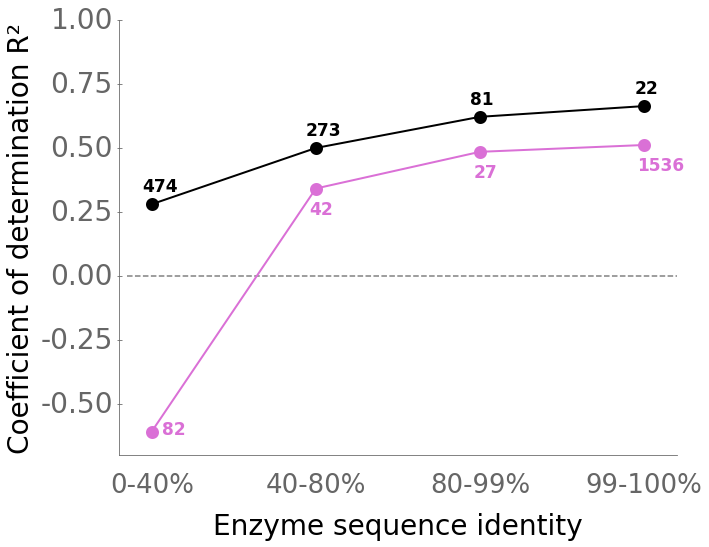

In [21]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})

splits = ["0-40%", "40-80%", "80-99%","99-100%"]
lower_bounds = [0,40,80,99]
upper_bounds = [40,80,99,100]

points1 ,points1_sim = [], []
points2, points2_sim = [], []
n_points1, n_points2 = [], []
n_points1_sim, n_points2_sim = [], []

for i, split in enumerate(splits):

    lb, ub = lower_bounds[i], upper_bounds[i]
    
    help_df = data_test.loc[data_test["max_ident"]>= lb].loc[data_test["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_kcat = len(y_pred)
    R2 =  r2_score(y_true, y_pred)
    abs_error = abs(y_true - y_pred)
    
    
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["sim_pred"])
    n_kcat_sim = len(y_pred)
    R2_sim =  r2_score(y_true, y_pred)
    abs_error_sim = abs(y_true - y_pred)
    
    help_df = data_test_DLkcat.loc[data_test_DLkcat["max_ident"]>= lb].loc[data_test_DLkcat["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_DLkcat = len(y_pred)
    R2_DLkcat =  r2_score(y_true, y_pred)
    abs_error_DLkcat = abs(y_true - y_pred)
    
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["sim_pred"])
    n_kcat_DLkcat_sim = len(y_pred)
    R2_DLkcat_sim =  r2_score(y_true, y_pred)
    abs_error_DLkcat_sim = abs(y_true - y_pred)
    

    print(split, R2, R2_sim, R2_DLkcat, R2_DLkcat_sim)
    points1.append(R2)
    points1_sim.append(R2_sim)
    points2.append(R2_DLkcat)
    points2_sim.append(R2_DLkcat_sim)
    
    n_points1.append(n_kcat)
    n_points1_sim.append(n_kcat_sim)
    n_points2.append(n_DLkcat)
    n_points2_sim.append(n_kcat_DLkcat_sim)


ticks2 = np.array(range(len(splits)))
labs = splits
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((-0.7,1))
plt.xlim((-0.2, 3.2))
plt.legend(loc = "lower right", fontsize=20)
plt.ylabel('Coefficient of determination R²')
plt.xlabel('Enzyme sequence identity')
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

plt.plot([-0.15,4], [0,0], color='grey', linestyle='dashed')


plt.plot([0,1,2,3], points1, c= "black", linewidth=2)
plt.plot([0,1,2,3], points2, c= "orchid", linewidth=2)

for i, split in enumerate(splits):
    points1.append(R2)
    points2.append(R2_DLkcat)
    
    if i ==0:
        plt.scatter(i, points1[i], c='black', marker="o", linewidths= 8, label ="KCATpred")
        plt.scatter(i, points2[i], c='orchid', marker="o", linewidths= 8, label ="DLkcat")
        ax.annotate(n_points1[i], (i-0.06, points1[i]+0.05), fontsize=17, c= "black", weight = "bold")
        ax.annotate(n_points2[i], (i+0.06, points2[i]-0.01), fontsize=17, c='orchid', weight = "bold")

    else:
        plt.scatter(i, points1[i], c='black', marker="o", linewidths= 8)
        plt.scatter(i, points2[i], c='orchid', marker="o", linewidths= 8)
        ax.annotate(n_points1[i], (i-0.06, points1[i]+0.05), fontsize=17, c= "black", weight = "bold")
        ax.annotate(n_points2[i], (i-0.04, points2[i]-0.10), fontsize=17, c='orchid', weight = "bold")
            


            

plt.show()

0-40% 0.5340075669772718 0.017031398776714425
40-80% 0.7053270932283959 0.6016337360084704
80-99% 0.7994243130617344 0.7176680331371708
99-100% 0.8010763563536277 0.7399567971986073


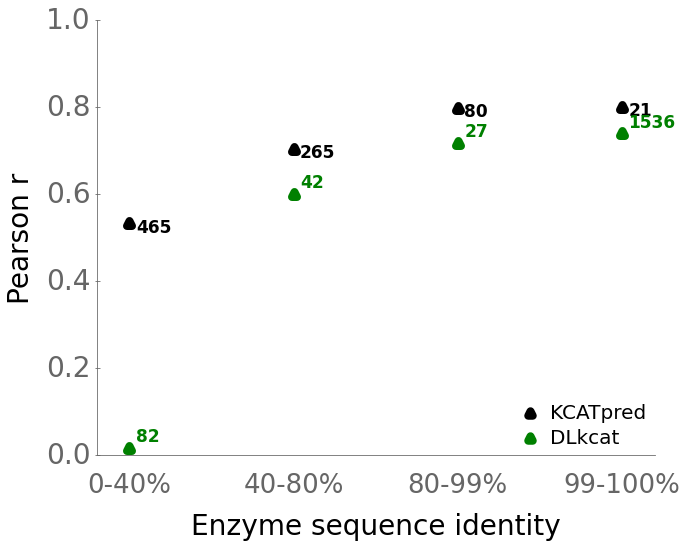

In [64]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})

splits = ["0-40%", "40-80%", "80-99%","99-100%"]
lower_bounds = [0,40,80,99]
upper_bounds = [40,80,99,100]

for i, split in enumerate(splits):

    lb, ub = lower_bounds[i], upper_bounds[i]
    
    help_df = data_test.loc[data_test["max_ident"]>= lb].loc[data_test["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_kcat = len(y_pred)
    pearson_r =  stats.pearsonr(y_true, y_pred)[0]
    
    help_df = data_test_DLkcat.loc[data_test_DLkcat["max_ident"]>= lb].loc[data_test_DLkcat["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_DLkcat = len(y_pred)
    pearson_r_DLkcat =  stats.pearsonr(y_true, y_pred)[0]
    

    print(split, pearson_r, pearson_r_DLkcat)
    
    if i ==0:
        plt.scatter(i, pearson_r, c='black', marker='^', linewidths= 8, label ="KCATpred")
        plt.scatter(i, pearson_r_DLkcat, c='green', marker='^', linewidths= 8, label ="DLkcat")
        ax.annotate(n_kcat, (i+0.04, pearson_r-0.02), fontsize=17, c= "black", weight = "bold")
        ax.annotate(n_DLkcat, (i+0.04, pearson_r_DLkcat+0.015), fontsize=17, c='green', weight = "bold")

    else:
        plt.scatter(i, pearson_r, c='black', marker='^', linewidths= 8)
        plt.scatter(i, pearson_r_DLkcat, c='green', marker='^', linewidths= 8)
        ax.annotate(n_kcat, (i+0.04, pearson_r-0.02), fontsize=17, c= "black", weight = "bold")
        ax.annotate(n_DLkcat, (i+0.04, pearson_r_DLkcat+0.015), fontsize=17, c='green', weight = "bold")


ticks2 = np.array(range(len(splits)))
labs = splits
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((0,1))
plt.xlim((-0.2, 3.2))
plt.legend(loc = "lower right", fontsize=20)
plt.ylabel('Pearson r')
plt.xlabel('Enzyme sequence identity')
ax.yaxis.set_label_coords(-0.11, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0-40% 0.2814016099629677 -0.6072304105234347
40-80% 0.5011924207779686 0.34280134977895493
80-99% 0.6230368009214954 0.48622435213243465
99-100% 0.6649909290506475 0.5128517542754034


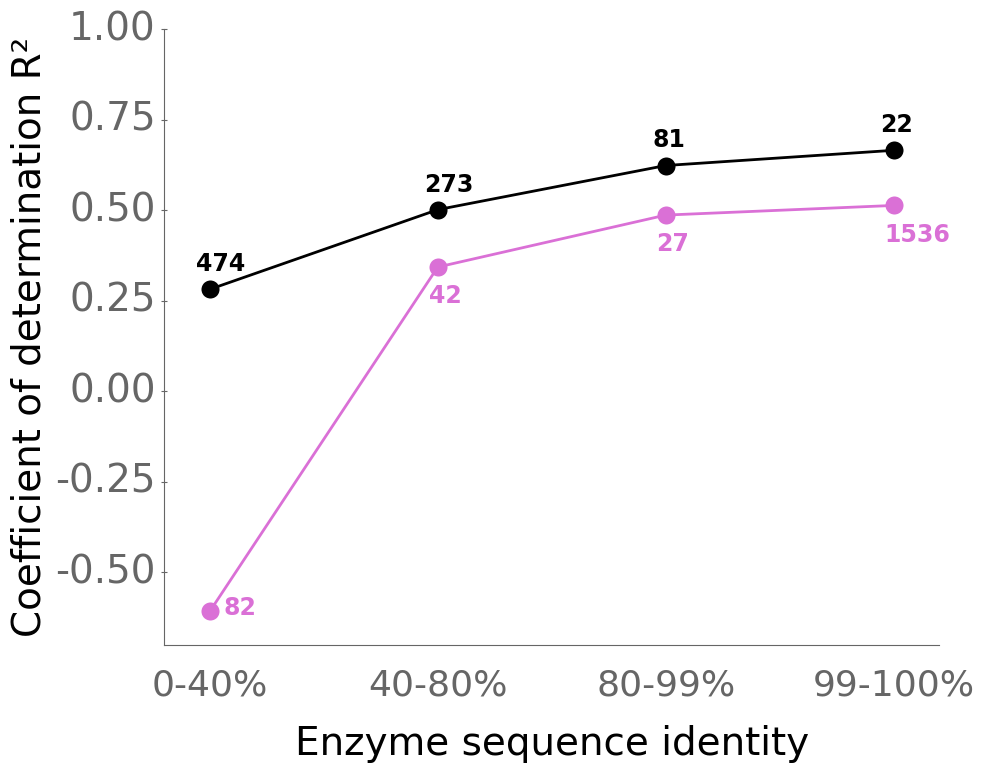

In [88]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})

splits = ["0-40%", "40-80%", "80-99%","99-100%"]
lower_bounds = [0,40,80,99]
upper_bounds = [40,80,99,100]

points1 = []
points2 = []
n_points1, n_points2 = [], []

for i, split in enumerate(splits):

    lb, ub = lower_bounds[i], upper_bounds[i]
    
    help_df = data_test.loc[data_test["max_ident"]>= lb].loc[data_test["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_kcat = len(y_pred)
    R2 =  r2_score(y_true, y_pred)
    abs_error = abs(y_true - y_pred)
    
    help_df = data_test_DLkcat.loc[data_test_DLkcat["max_ident"]>= lb].loc[data_test_DLkcat["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_DLkcat = len(y_pred)
    R2_DLkcat =  r2_score(y_true, y_pred)
    abs_error_DLkcat = abs(y_true - y_pred)
    

    print(split, R2, R2_DLkcat)
    points1.append(R2)
    points2.append(R2_DLkcat)
    
    n_points1.append(n_kcat)
    n_points2.append(n_DLkcat)


ticks2 = np.array(range(len(splits)))
labs = splits
ax.set_xticks(ticks2)
ax.set_xticklabels(labs,  y= -0.03, fontsize=26)
ax.tick_params(axis='x', length=0, rotation = 0)

plt.ylim((-0.7,1))
plt.xlim((-0.2, 3.2))
plt.legend(loc = "lower right", fontsize=20)
plt.ylabel('Coefficient of determination R²')
plt.xlabel('Enzyme sequence identity')
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.xaxis.set_label_coords(0.5,-0.13)



plt.plot([0,1,2,3], points1, c= "black", linewidth=2)
plt.plot([0,1,2,3], points2, c= "orchid", linewidth=2)

for i, split in enumerate(splits):
    points1.append(R2)
    points2.append(R2_DLkcat)
    
    if i ==0:
        plt.scatter(i, points1[i], c='black', marker="o", linewidths= 8, label ="KCATpred")
        plt.scatter(i, points2[i], c='orchid', marker="o", linewidths= 8, label ="DLkcat")
        ax.annotate(n_points1[i], (i-0.06, points1[i]+0.05), fontsize=17, c= "black", weight = "bold")
        ax.annotate(n_points2[i], (i+0.06, points2[i]-0.01), fontsize=17, c='orchid', weight = "bold")

    else:
        plt.scatter(i, points1[i], c='black', marker="o", linewidths= 8)
        plt.scatter(i, points2[i], c='orchid', marker="o", linewidths= 8)
        ax.annotate(n_points1[i], (i-0.06, points1[i]+0.05), fontsize=17, c= "black", weight = "bold")
        ax.annotate(n_points2[i], (i-0.04, points2[i]-0.10), fontsize=17, c='orchid', weight = "bold")
            


plt.show()


#### Testing if differences in model performance is statistically significant using a one-sided Mann-Whitney U test

In [35]:
from scipy.stats import mannwhitneyu

splits = ["0-40%", "40-80%", "80-99%","99-100%"]
lower_bounds = [0,40,80,99]
upper_bounds = [40,80,99,100]

for i, split in enumerate(splits):

    lb, ub = lower_bounds[i], upper_bounds[i]
    
    help_df = data_test.loc[data_test["max_ident"]>= lb].loc[data_test["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_kcat = len(y_pred)
    R2 =  r2_score(y_true, y_pred)
    abs_error = abs(y_true - y_pred)
    
    help_df = data_test_DLkcat.loc[data_test_DLkcat["max_ident"]>= lb].loc[data_test_DLkcat["max_ident"]<= ub]
    y_true = np.array(help_df["y_true"])
    y_pred = np.array(help_df["y_pred"])
    n_DLkcat = len(y_pred)
    R2_DLkcat =  r2_score(y_true, y_pred)
    abs_error_DLkcat = abs(y_true - y_pred)
    
    res = mannwhitneyu(abs_error, abs_error_DLkcat, alternative="less")
    print(split, res)

0-40% MannwhitneyuResult(statistic=10975.0, pvalue=1.5135322688706623e-10)
40-80% MannwhitneyuResult(statistic=4132.0, pvalue=0.0017915422287357661)
80-99% MannwhitneyuResult(statistic=702.0, pvalue=0.0027672622913853277)
99-100% MannwhitneyuResult(statistic=13948.0, pvalue=0.07975196445872013)


## 4. Comparing different sources of kcat values in test dataset

In [92]:
model = "ESM1b_ts_difff_fp_separate"

pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
data_train = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat.pkl"))
data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat.pkl"))
data_test["y_true"] = test_y
data_test["y_pred"] = pred_y


for ind in data_test.index:
    data_test["from_BRENDA"][ind] = np.mean(data_test["from_BRENDA"][ind])
    data_test["from_Sabio"][ind] = np.mean(data_test["from_Sabio"][ind])
    data_test["from_Uniprot"][ind] = np.mean(data_test["from_Uniprot"][ind])
    data_test["checked"][ind] = np.mean(data_test["checked"][ind])
    
    
columns = ["from_BRENDA", "from_Sabio", "from_Uniprot", "checked"]
for column in columns:
    help_df = data_test.loc[data_test[column] == 1]
    y_pred, y_true = np.array(help_df["y_pred"]), np.array(help_df["y_true"])
    
    MSE = np.mean(abs(np.reshape(y_true, (-1)) - y_pred)**2)
    R2 = r2_score(np.reshape(y_true, (-1)), y_pred)
    pearson_r = stats.pearsonr(y_true, y_pred)[0]
    
    print("Source: %s, no. of data points: %s, MSE: %s, R²: %s, pearson r: %s" %
          (column, len(help_df), MSE, R2, pearson_r))

Source: from_BRENDA, no. of data points: 608, MSE: 0.8644825863653809, R²: 0.39205752485871626, pearson r: 0.6545772031701992
Source: from_Sabio, no. of data points: 51, MSE: 0.5050674667868178, R²: 0.48091695275256685, pearson r: 0.7252781571061273
Source: from_Uniprot, no. of data points: 193, MSE: 0.9401536294534142, R²: 0.3812980141526323, pearson r: 0.6361223052112547
Source: checked, no. of data points: 284, MSE: 0.9449160311750975, R²: 0.3480657772454745, pearson r: 0.6238625423159976


### Predicting Proteom allocation

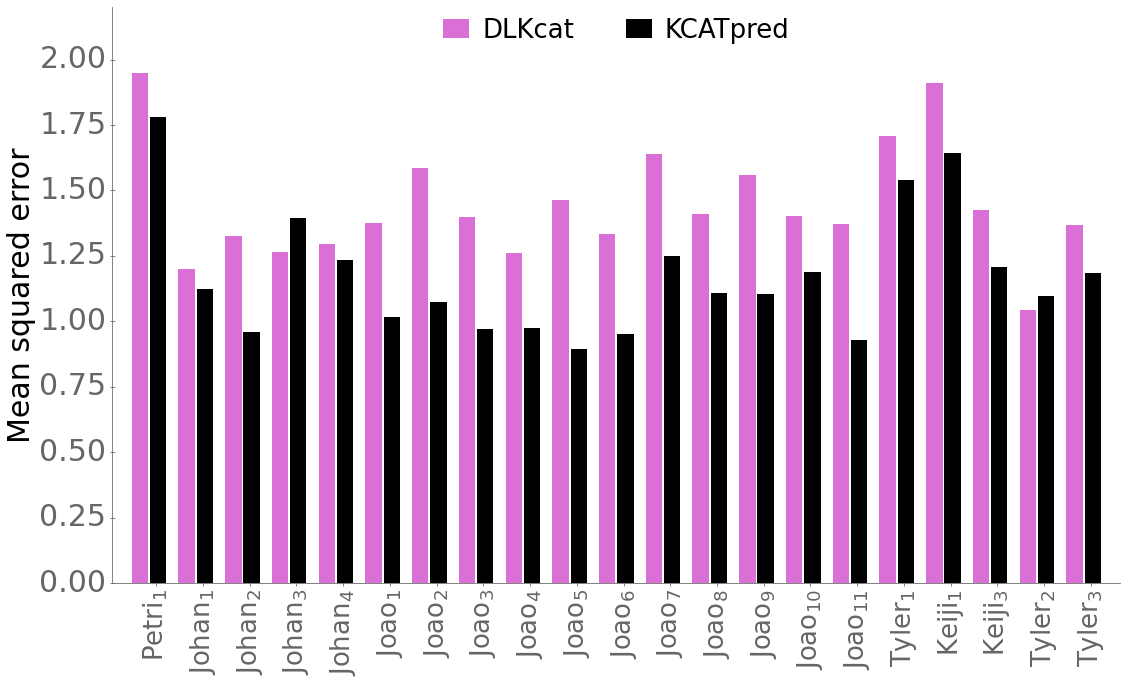

In [43]:
fig, ax = plt.subplots(figsize= (14,8))
plt.rcParams.update({'font.size': 28})

conditions = ["$Petri_1$", "$Johan_1$", "$Johan_2$", "$Johan_3$", "$Johan_4$",
              "$Joao_1$", "$Joao_2$", "$Joao_3$", "$Joao_4$", "$Joao_5$", "$Joao_6$",
              "$Joao_7$", "$Joao_8$", "$Joao_9$", "$Joao_{10}$", "$Joao_{11}$", "$Tyler_1$",
              "$Keiji_1$","$Keiji_3$", "$Tyler_2$", "$Tyler_3$"]


data = [[1.3958, 1.0951, 1.1511, 1.1255, 1.1380, 1.1731, 1.2599, 1.1834, 1.1232,
         1.2105, 1.1553, 1.2801, 1.1873, 1.2479, 1.1843, 1.1711, 1.3075, 1.3824, 1.1935,1.0210, 1.1693],
        [ 1.3348, 1.0608, 0.9795, 1.1813, 1.1117, 1.0074, 1.0357, 0.9859, 0.9882,
         0.9457, 0.9748, 1.1171, 1.0519, 1.0512, 1.0897, 0.9635, 1.2411, 1.2818, 1.0986 ,1.0474, 1.0883]]

X = np.arange(len(conditions))
ax = fig.add_axes([0,0,1,1])

barWidth = 0.35
eps = 0.04

plt.xticks([r + barWidth for r in range(len(data[0]))], conditions, rotation = 90, fontsize=26)
plt.yticks( fontsize=30)

ax.bar(X + 0.00, np.array(data[0])**2, color = 'orchid', width = barWidth, label = "DLKcat")
ax.bar(X + barWidth + eps, np.array(data[1])**2, color = 'black', width = barWidth, label = "KCATpred")

plt.ylabel('Mean squared error', fontsize=30)
plt.legend(loc = "upper center", ncol = 2, fontsize=26)
plt.ylim((0,2.2))
plt.show()

### Plotting orginal kcat values and log10-transformed kcat values

In [3]:
df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "final_kcat_dataset.pkl"))

In [5]:
kcat_values = 10**np.array(df_kcat["geomean_kcat"])
log10_kcat_values = np.array(df_kcat["geomean_kcat"])

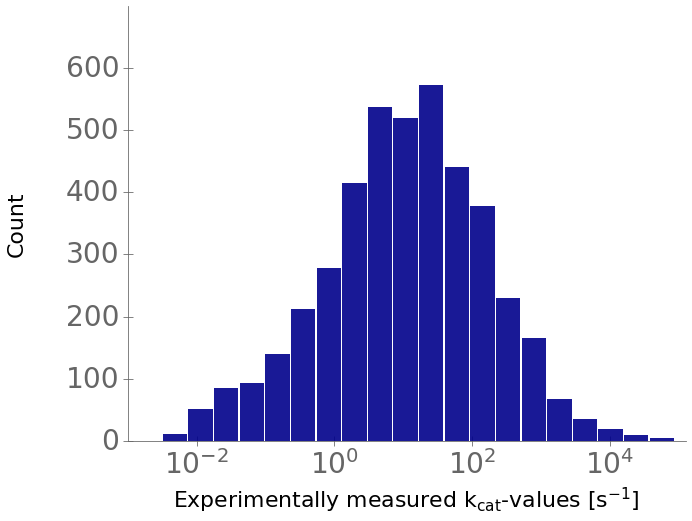

In [40]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({'font.size': 28})


plt.ylim(ymax = 699, ymin = 0)
plt.xlim(xmax = 5.1, xmin = -3)

ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])
#plt.yticks([-2,0,2,4], ["$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])

plt.ylabel("Count", fontsize = 22)
plt.xlabel("Experimentally measured $k_{cat}$-values [$s^{-1}$]", fontsize = 22)
plt.hist(log10_kcat_values, alpha = 0.9, color="darkblue",rwidth = 0.95, bins = 20)
plt.show()

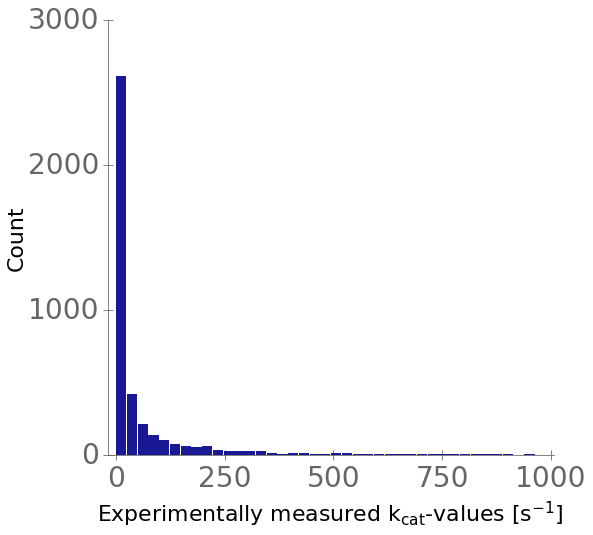

In [42]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


plt.ylim(ymax = 2500, ymin = 0)
#plt.xlim(xmax = 5, xmin = -0.1)

ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.yticks([0,1000,2000,3000], ["0","1000","2000","3000"])
plt.xticks([0,250,500, 750, 1000], ["0","250","500", "750", "1000"])

plt.ylabel("Count", fontsize = 22)
plt.xlabel("Experimentally measured $k_{cat}$-values [$s^{-1}$]", fontsize = 22)
plt.hist(kcat_values[kcat_values<1000], alpha = 0.9, color="darkblue", rwidth = 0.95, bins = 40)
plt.show()

## Only considering predictions for Escherichia coli:

#### (a) Loading predictions:

In [ ]:
pred_y = np.load(join("..", "..", "data", "training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("..", "..", "data", "training_results", "y_test_true_xgboost_" + model + ".npy"))
data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat.pkl"))
data_test["y_true"] = test_y
data_test["y_pred"] = pred_y

#### (b) Creating a txt file with all Uniprot IDs to the organism name for every data point:

In [6]:
data_test["Uniprot ID"] = [UIDs[0] for UIDs in data_test["Uniprot IDs"]]

IDs = list(set(data_test["Uniprot ID"]))
f = open(join("..", "..", "data", "enzyme_data", "UNIPROT_IDs_test_set.txt"), "w") 
for ID in list(set(IDs)):
    f.write(str(ID) + "\n")
f.close()

#### (c) Using the UniProt Mapping service to map Uniprot IDs to organism names:

In [8]:
UNIPROT_df = pd.read_csv(join("..", "..", "data", "enzyme_data",  "UNIPROT_results_test_set.tsv"), sep = "\t")
UNIPROT_df.drop(columns = ["Entry"], inplace = True)
display(UNIPROT_df.head())

data_test = data_test.merge(UNIPROT_df, how = "left", on = "Uniprot ID")

,Uniprot ID,Organism
0,F7YTI3,Pseudothermotoga thermarum DSM 5069
1,O05306,Mycobacterium tuberculosis (strain ATCC 25618 ...
2,A8IKD2,Azorhizobium caulinodans (strain ATCC 43989 / ...
3,Q8PDQ6,Xanthomonas campestris pv. campestris (strain ...
4,Q6XL56,Fusobacterium nucleatum


In [21]:
Ecoli_ind = [ind  for ind in data_test.index if "Escherichia coli (strain K12)" in data_test["Organism"][ind]]


y_test_pred = data_test["y_pred"].loc[Ecoli_ind]
test_Y = data_test["y_true"].loc[Ecoli_ind]
MSE_dif_fp_test = np.mean(abs(np.reshape(test_Y, (-1)) - y_test_pred)**2)
R2_dif_fp_test = r2_score(np.reshape(test_Y, (-1)), y_test_pred)
Pearson = stats.pearsonr(np.reshape(test_Y, (-1)), y_test_pred)

print(Pearson, MSE_dif_fp_test, R2_dif_fp_test)

(0.4869487064829419, 3.382004165523896e-05) 1.0180411592099263 0.2321770387743426


## Calculating how much mean deviation we have between two measurements for the same enzyme-reaction pair:

In [41]:
df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data", "merged_and_grouped_kcat_dataset_with_FPs_and_ESM1bs.pkl"))
df = pd.DataFrame({"Reaction": df_kcat["Reaction ID"], "Sequence" : df_kcat["Sequence ID"],
                  "kcats" :df_kcat["kcat_values"]})
df.head()

,Reaction,Sequence,kcats
0,Reaction_0,Sequence_309,"[2.8, 0.05, 0.11, 205.0, 2.3, 134.0, 360.0]"
1,Reaction_1,Sequence_309,"[1.2, 3.4, 0.61, 0.07]"
2,Reaction_2,Sequence_3142,"[6.18, 14.5, 11.58, 13.12, 11.9, 13.98, 14.08,..."
3,Reaction_4,Sequence_3263,"[57.1, 19.6, 5.96, 13.6, 26.4, 14.0, 41.1, 11...."
4,Reaction_5,Sequence_2101,"[2.98, 0.87]"


In [53]:
ind = 0

deviations = []

for ind in df.index:
    kcats = df["kcats"][ind]
    if len(kcats) > 1 :
        for i in range(len(kcats)):
            for j in range(i+1, len(kcats)):
                deviations.append(abs(np.log10(float(kcats[i])) - np.log10(float(kcats[j]))))
                
np.round(np.mean(deviations),2), np.round(10**np.mean(deviations),2)

(0.75, 5.67)